In [41]:
# Import findspark and initialize. 
import findspark
findspark.init()

In [42]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("bigfoot").getOrCreate()

In [43]:
# Read in data from S3 Buckets
from pyspark import SparkFiles
url ="https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-classroom/v1.2/22-big-data/2/bigfoot.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("bigfoot.csv"), header=True, inferSchema=True, timestampFormat="yyyy/MM/dd HH:mm:ss")

# Show DataFrame
df.show()

+------+--------------------+--------------+--------------------+--------+---------+
|number|               title|classification|           timestamp|latitude|longitude|
+------+--------------------+--------------+--------------------+--------+---------+
|   637|Report 637: Campe...|       Class A|2000-06-16T12:00:00Z|    61.5|   -142.9|
|  2917|Report 2917: Fami...|       Class A|1995-05-15T12:00:00Z| 55.1872|-132.7982|
|  7963|Report 7963: Sasq...|       Class A|2004-02-09T12:00:00Z| 55.2035|-132.8202|
|  9317|Report 9317: Driv...|       Class A|2004-06-18T12:00:00Z| 62.9375|-141.5667|
| 13038|Report 13038: Sno...|       Class A|2004-02-15T12:00:00Z| 61.0595|-149.7853|
| 23666|Report 23666: Pas...|       Class A|2008-04-23T12:00:00Z|62.77335|-141.3165|
| 26604|Report 26604: Day...|       Class A|2009-07-15T12:00:00Z|64.89139|-147.8142|
|   179|Report 179: Man a...|       Class A|1981-09-15T12:00:00Z|32.31435|-85.16235|
|   245|Report 245: Two o...|       Class A|1999-07-15T12:00:00Z|

23/11/09 00:40:07 WARN SparkContext: The path https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-classroom/v1.2/22-big-data/2/bigfoot.csv has been added already. Overwriting of added paths is not supported in the current version.


In [44]:
# Import date time functions
from pyspark.sql.functions import month, year

In [45]:
# Create a new DataFrame with the column Year
df2 = df.withColumn('year', year('timestamp'))
df2.show()

+------+--------------------+--------------+--------------------+--------+---------+----+
|number|               title|classification|           timestamp|latitude|longitude|year|
+------+--------------------+--------------+--------------------+--------+---------+----+
|   637|Report 637: Campe...|       Class A|2000-06-16T12:00:00Z|    61.5|   -142.9|2000|
|  2917|Report 2917: Fami...|       Class A|1995-05-15T12:00:00Z| 55.1872|-132.7982|1995|
|  7963|Report 7963: Sasq...|       Class A|2004-02-09T12:00:00Z| 55.2035|-132.8202|2004|
|  9317|Report 9317: Driv...|       Class A|2004-06-18T12:00:00Z| 62.9375|-141.5667|2004|
| 13038|Report 13038: Sno...|       Class A|2004-02-15T12:00:00Z| 61.0595|-149.7853|2004|
| 23666|Report 23666: Pas...|       Class A|2008-04-23T12:00:00Z|62.77335|-141.3165|2008|
| 26604|Report 26604: Day...|       Class A|2009-07-15T12:00:00Z|64.89139|-147.8142|2009|
|   179|Report 179: Man a...|       Class A|1981-09-15T12:00:00Z|32.31435|-85.16235|1981|
|   245|Re

In [46]:
# Save the year as a new column


In [47]:
from pyspark.sql import functions as F, types as T
# Find the total bigfoot sightings per year
df_plot = df2.groupBy('year').agg(F.sum('number'))

In [48]:
df_plot.columns

['year', 'sum(number)']

In [49]:
df_plot = df_plot.withColumnRenamed('sum(number)', 'sightings')
df_plot.show()

+----+---------+
|year|sightings|
+----+---------+
|1959|     7211|
|1990|   597283|
|1975|   589546|
|1977|   659752|
|2003|  1752268|
|2007|  3540238|
|1869|    14338|
|1974|   569623|
|2015|  2897024|
|1955|    38810|
|2006|  3380067|
|1978|  1092140|
|1925|    24413|
|1961|   150923|
|2013|  4376577|
|1942|     1303|
|1944|    31793|
|NULL|    31929|
|1952|     4353|
|1956|    23107|
+----+---------+
only showing top 20 rows



<Axes: xlabel='year'>

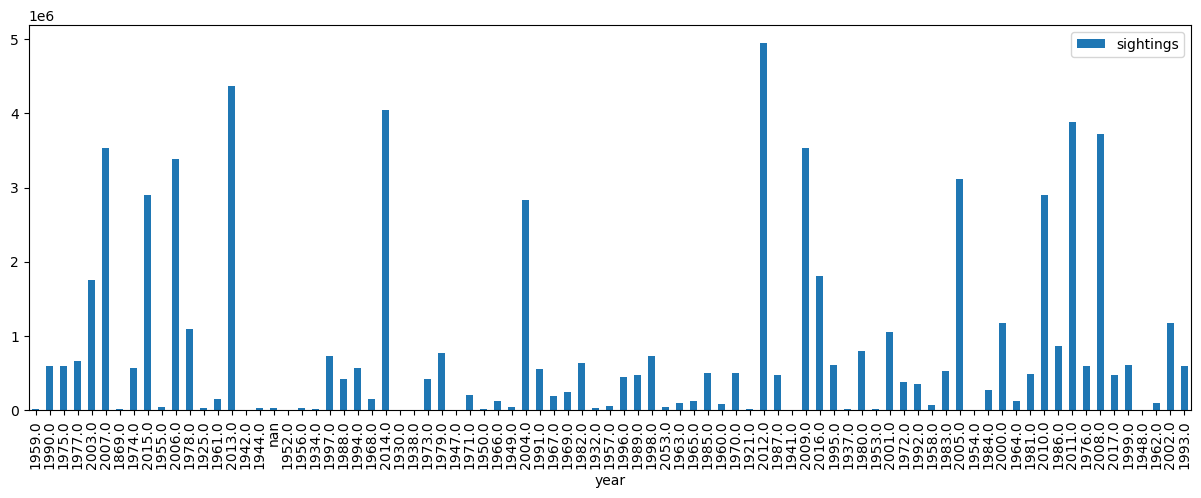

In [54]:
# Import the summarized data to a pandas DataFrame for plotting
# Note: If your summarized data is still too big for your local memory then your notebook may crash
from numpy import size
import pandas as pd
df_plot2 = df_plot.toPandas()
df_plot2.plot(x='year', y='sightings', kind='bar', figsize=(15,5))

In [51]:
# Clean the data and rename the count column to "sightings"


In [52]:
import plotly.express as px
# Create a Plotly graph.
